In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy as sc
import pandas as pd
import math as mt
import ROOT
import os
import random
import MyFunction as mf
from array import array
from ROOT import TCanvas, gStyle, TFile, TProfile, TNtuple, TH1D, TH2D, TH3D, TGraph, TMultiGraph, TPad, THStack, TH1F, TLegend, gROOT 

Welcome to JupyROOT 6.21/01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


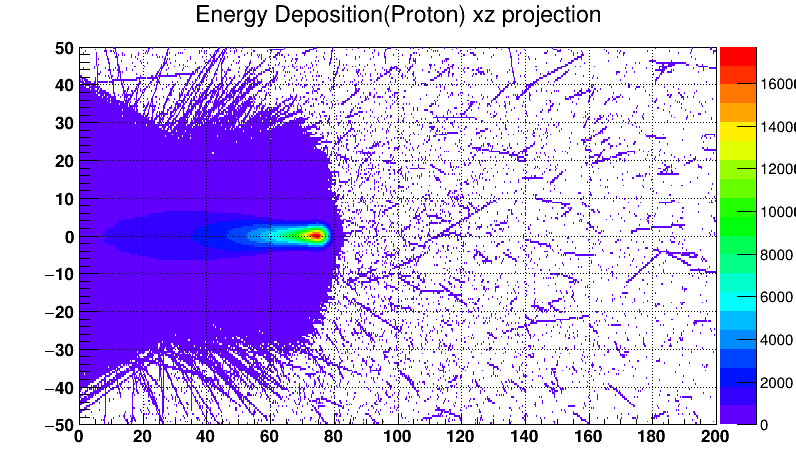

In [80]:
DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Convergent_Data/Min Spot size scan 100MeV/Energy_100_Alpha:_18._Beta:_1360.mm_Sigma_10.mm.root")
Energy_Distribution = DataFile.Get('ProtonEnergyHisto')

c1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 800, 500)

Energy_Distribution_Z = Energy_Distribution.Project3D('xz').Clone('Energy_Distribution_Z')
Energy_Distribution_Z.Scale(1/1000000)
Energy_Distribution_Z.Draw("COLZ")
Energy_Distribution_Z.SetStats(0)
gStyle.SetPalette(1)
c1.Update()
c1.GetFrame().SetFillColor(0)
c1.GetFrame().SetBorderSize( 12 )
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor( 0 )
c1.SetGridx()
c1.SetGridy()
c1.Modified()
c1.Update()
c1.Draw()

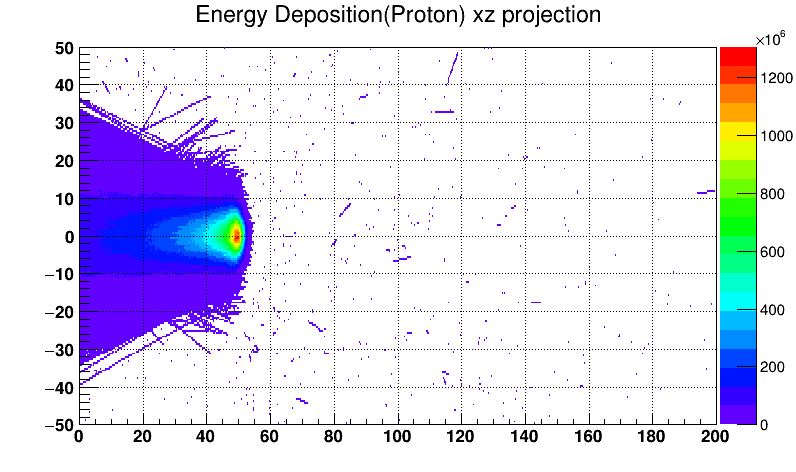

In [6]:
DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Convergent_Data/Energy_80_Alpha:_5.0_Beta:_393.0mm_Sigma_10.mm.root")
Energy_Distribution = DataFile.Get('ProtonEnergyHisto').Project3D('xz')

c1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 800, 500)


Energy_Distribution.Draw("COLZ")
Energy_Distribution.SetStats(0)
gStyle.SetPalette(1)
c1.Update()
c1.GetFrame().SetFillColor(0)
c1.GetFrame().SetBorderSize( 12 )
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor( 0 )
c1.SetGridx()
c1.SetGridy()
c1.Modified()
c1.Update()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


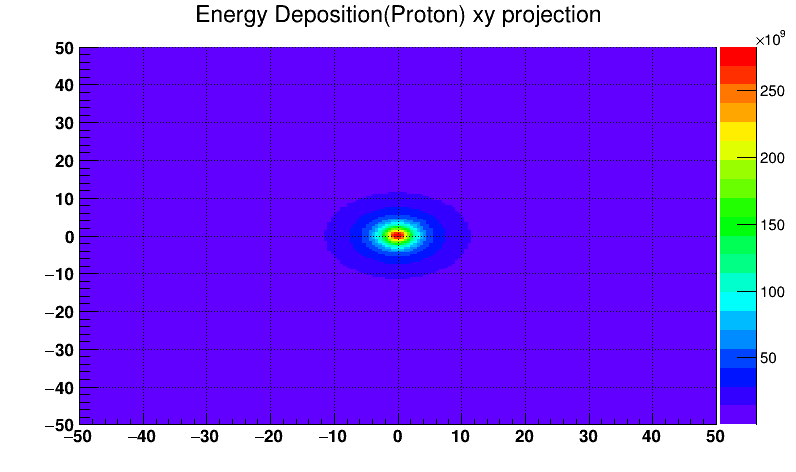

In [24]:

Location ="/home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/"

DataFileList = ['Energy_350_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root', 'Energy_350_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root', 'Energy_350_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root']

DataFile = ROOT.TFile(Location+DataFileList[6])
Energy_Distribution = DataFile.Get('ProtonEnergyHisto').Project3D('xy')

c1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 800, 500)


Energy_Distribution.Draw("COLZ")
Energy_Distribution.SetStats(0)
gStyle.SetPalette(1)
c1.Update()
c1.GetFrame().SetFillColor(0)
c1.GetFrame().SetBorderSize(12)
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor(0)
c1.SetGridx()
c1.SetGridy()
c1.Modified()
c1.Update()
c1.Draw()

In [16]:
DataFileLocation = "/home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/"
# DataFileList = os.listdir(DataFileLocation)
# File = pd.DataFrame(DataFileList)
# print(DataFileList)
# display(File)
# DataFile = ROOT.TFile(DataFileLocation+"/"+DataFileList[])

DataFileList = ['Energy_350_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root', 'Energy_350_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root', 'Energy_350_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_16._Beta:_1606.mm_Sigma_15.mm.root', 
                'Energy_350_Alpha:_18._Beta:_1805.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_20._Beta:_2005.mm_Sigma_15.mm.root']

Energy_Distribution    =  []
num_proton             =  []

for i in range(0, len(DataFileList)):
    print(DataFileList[i])
    file = DataFileLocation+"/"+DataFileList[i]
    DataFile = ROOT.TFile(file)
    NumProton = DataFile.Get('ParticelCounter').GetBinContent(1)
    print(NumProton)
    num_proton.append(NumProton)
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    name = DataFileList[i]+"_xy"
    Distribution = Energy.Project3D("xy").Clone(name)
#     RBE = RBEMatrix(file)
#     Distribution.Multiply(RBE)
    Distribution.SetDirectory(0)
    Energy_Distribution.append(Distribution)


cs = TCanvas("cs","cs", 900,700)
gStyle.SetPalette(1)
cs.Divide(2,4)
Radius = ["0.5", "1.0", "2.0", "3.0", "4.0", "6.0", "8.0", "10.0"]
for i in range(0,7):
    cs.cd(i+1);
    cs.SetFillColor( 0 )
    cs.GetFrame().SetFillColor( 21 )
    cs.GetFrame().SetBorderSize( 6 )
    cs.GetFrame().SetBorderMode( -1 )
    
    Histogram = Energy_Distribution[i]
    
    Histogram.Scale(1/num_proton[i])
    maxvalue = Histogram.GetMaximum();
    Histogram.Scale(1/maxvalue)

    Histogram.GetXaxis().SetTitle("Depth [mm]");
    Histogram.GetYaxis().SetTitle("Transverse Position [mm]");
    Histogram.GetXaxis().CenterTitle();
    Histogram.GetYaxis().CenterTitle();
    Histogram.GetXaxis().SetRangeUser(0, 180);
    Histogram.GetYaxis().SetRangeUser(-20, 20);
    Histogram.GetXaxis().SetLabelSize(.04)
    Histogram.GetYaxis().SetLabelSize(.04)
    Histogram.GetZaxis().SetLabelSize(.04)
    Histogram.GetXaxis().SetTitleSize(.04)
    Histogram.GetYaxis().SetTitleSize(.04)
    Title = "Collimator radius : "+Radius[i]
    Histogram.SetTitleSize(.16)
    Histogram.SetStats(0)
    Histogram.SetTitle(Title)
    Histogram.Draw("COLZ")
    cs.SetRightMargin(0.9)
    cs.SetLeftMargin(0.25)
    cs.SetBottomMargin(0.25)
    cs.Modified()
    cs.Update()
    
#cs.Print("/home/fardousr/Desktop/Output/Graphs/Physical Dose 150MeV different Collimator radii.png") 
cs.Draw()

Energy_350_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root
0.0
Energy_350_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root
0.0
Energy_350_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root
0.0
Energy_350_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root
0.0
Energy_350_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root
0.0
Energy_350_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root
0.0
Energy_350_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root
0.0
Energy_350_Alpha:_16._Beta:_1606.mm_Sigma_15.mm.root
0.0
Energy_350_Alpha:_18._Beta:_1805.mm_Sigma_15.mm.root
0.0
Energy_350_Alpha:_20._Beta:_2005.mm_Sigma_15.mm.root
0.0


ZeroDivisionError: float division by zero

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cs


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cs
Info in <TCanvas::Print>: png file /home/fardousr/Desktop/Output/Graphs/Physical Dose 350MeV diff alpha at 100mm xy.png has been created


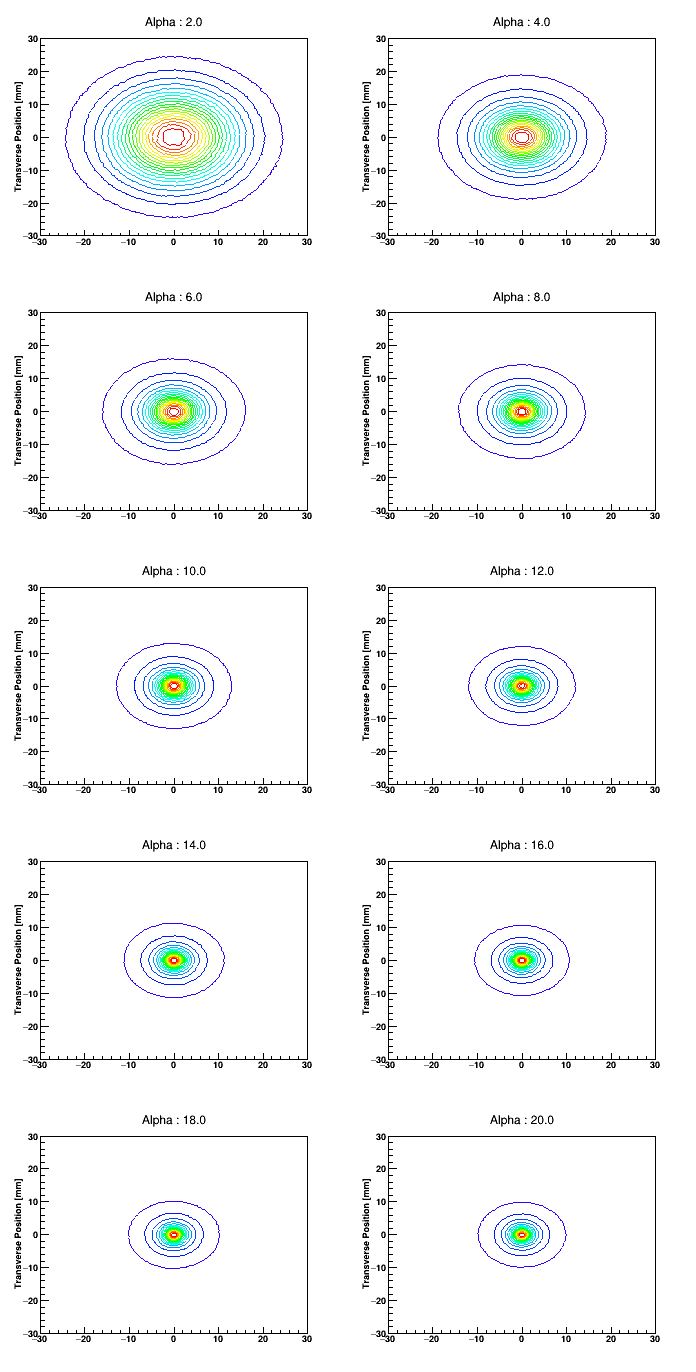

In [27]:
cs = TCanvas("cs","cs", 700,1400)
gStyle.SetPalette(1)
cs.Divide(2,5)
Alpha = ["2.0", "4.0", "6.0", "8.0", "10.0", "12.0", "14.0", "16.0", "18.0", "20.0"]
for i in range(0,10):
    cs.cd(i+1);
    cs.SetFillColor( 0 )
    cs.GetFrame().SetFillColor( 21 )
    cs.GetFrame().SetBorderSize( 6 )
    cs.GetFrame().SetBorderMode( -1 )
    
    Histogram = Energy_Distribution[i]
    
    #Histogram.Scale(1/num_proton[i])
    maxvalue = Histogram.GetMaximum();
    Histogram.Scale(1/maxvalue)

    Histogram.GetXaxis().SetTitle("Transverse Position [mm]");
    Histogram.GetYaxis().SetTitle("Transverse Position [mm]");
    Histogram.GetXaxis().CenterTitle();
    Histogram.GetYaxis().CenterTitle();
    Histogram.GetXaxis().SetRangeUser(-30, 30);
    Histogram.GetYaxis().SetRangeUser(-30, 30);
    Histogram.GetXaxis().SetLabelSize(.04)
    Histogram.GetYaxis().SetLabelSize(.04)
    Histogram.GetZaxis().SetLabelSize(.04)
    Histogram.GetXaxis().SetTitleSize(.04)
    Histogram.GetYaxis().SetTitleSize(.04)
    Title = "Alpha : "+Alpha[i]
    Histogram.SetTitleSize(.16)
    Histogram.SetStats(0)
    Histogram.SetTitle(Title)
    Histogram.Draw("CONT1")
    cs.SetRightMargin(0.9)
    cs.SetLeftMargin(0.25)
    cs.SetBottomMargin(0.25)
    cs.Modified()
    cs.Update()
    
cs.Print("/home/fardousr/Desktop/Output/Graphs/Physical Dose 350MeV diff alpha at 100mm xy.png") 
cs.Draw()

In [11]:
DataFileLocation = "/home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV"
DataFileList = os.listdir(DataFileLocation)
print(DataFileList)

['Energy_350_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root', 'Energy_350_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root', 'Energy_350_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root', 'Energy_350_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root', 'Energy_350_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root', 'Simulation Info.txt', 'Energy_350_Alpha:_16._Beta:_1606.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_18._Beta:_1805.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_20._Beta:_2005.mm_Sigma_15.mm.root']


Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root Title: 
Name: Alpha_0 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root Title: 
Name: Alpha_1 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root Title: 
Name: Alpha_2 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root Title: 
Name: Alpha_3 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root Title: 
Name: Alpha_4 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergen

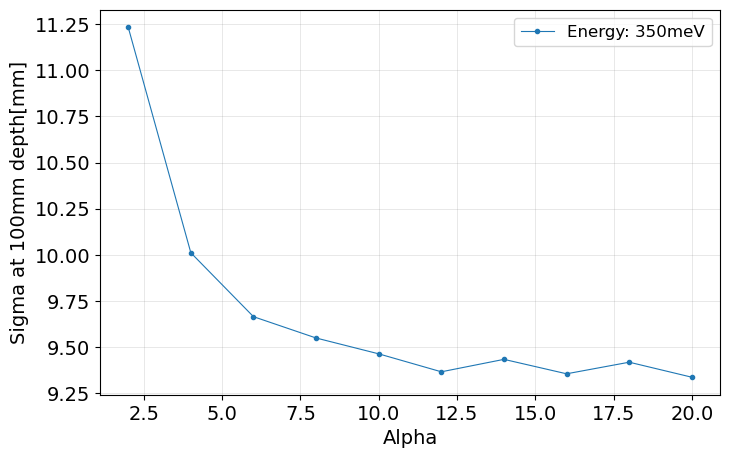

In [28]:
plt.rcdefaults()
params = {'figure.figsize'   : (8, 5),
          'legend.fontsize'  : 12,
          'axes.labelsize'   : 14,
          'axes.titlesize'   : 14,
          'xtick.labelsize'  : 14,
          'ytick.labelsize'  : 14,
          'axes.facecolor'   : 'white'}
pylab.rcParams.update(params)

DataFileLocation = "/home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/"

DataFileList = ['Energy_350_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root', 'Energy_350_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root', 'Energy_350_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_16._Beta:_1606.mm_Sigma_15.mm.root', 
                'Energy_350_Alpha:_18._Beta:_1805.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_20._Beta:_2005.mm_Sigma_15.mm.root']

alpha                  = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20] 

sigma_100mm            =  []

for i in range(0, len(DataFileList)):
    file = DataFileLocation+DataFileList[i]
    DataFile = ROOT.TFile(file)
    print(DataFile)
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    print(Energy)
    name = DataFileList[i]+"_xz"
    Distribution = Energy.ProjectionY(name, -200, 200, 99*4, 101*4).Clone(name)
    sigma_100mm.append(Distribution.GetStdDev())
    
    
plt.plot(alpha, sigma_100mm,'.-', label = 'Energy: 350meV', linewidth=0.8)
plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=.5)
plt.legend(loc='upper right')
plt.xlabel("Alpha")
plt.ylabel("Sigma at 100mm depth[mm]")
#plt.savefig("/home/fardousr/Desktop/Output/Graphs/Sigma at BP 100MeV alpha 6 to 26.png", dpi = 500)
plt.show()


Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root Title: 
Name: Alpha_0 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root Title: 
Name: Alpha_1 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root Title: 
Name: Alpha_2 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root Title: 
Name: Alpha_3 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root Title: 
Name: Alpha_4 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergen

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


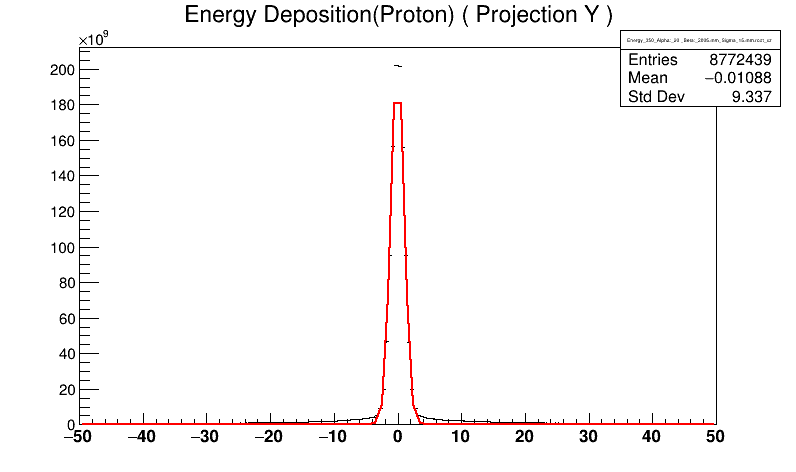

In [33]:
DataFileLocation = "/home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/"

DataFileList = ['Energy_350_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root', 'Energy_350_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root', 'Energy_350_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_16._Beta:_1606.mm_Sigma_15.mm.root', 
                'Energy_350_Alpha:_18._Beta:_1805.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_20._Beta:_2005.mm_Sigma_15.mm.root']

alpha                  = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20] 

sigma_100mm            =  [7.56503, 4.09189, 2.78532, 2.13402, 1.74881, 1.49953, 1.32822, 1.20595, 1.11419, 1.04257]

c1 = TCanvas( 'c1', 'c1', 800, 500 )

for i in range(len(DataFileList)):
    file = DataFileLocation+DataFileList[i]
    DataFile = ROOT.TFile(file)
    print(DataFile)
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    print(Energy)
    name = DataFileList[i]+"_xz"
    Distribution = Energy.ProjectionY(name, -200, 200, 99*4, 101*4).Clone(name)
    Distribution.Fit("gaus", "M", "SAME")
    Distribution.Draw("SAME")
    
c1.Update()
c1.Draw()

Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root Title: 
Name: Alpha_12 Title: Energy Deposition(Proton) NbinsX: 200
 FCN=1329.35 FROM HESSE     STATUS=OK             16 CALLS          82 TOTAL
                     EDM=5.91426e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.48182e+10   5.70742e+06   3.53293e+03   1.37674e-11
   2  Mean         3.25005e-02   4.77820e-03   1.70172e-05   2.26703e-01
   3  Sigma        1.49392e+01   3.63837e-03   2.33107e-07  -3.80847e-01
 FCN=667986 FROM HESSE     STATUS=OK             16 CALLS         148 TOTAL
                     EDM=7.55124e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


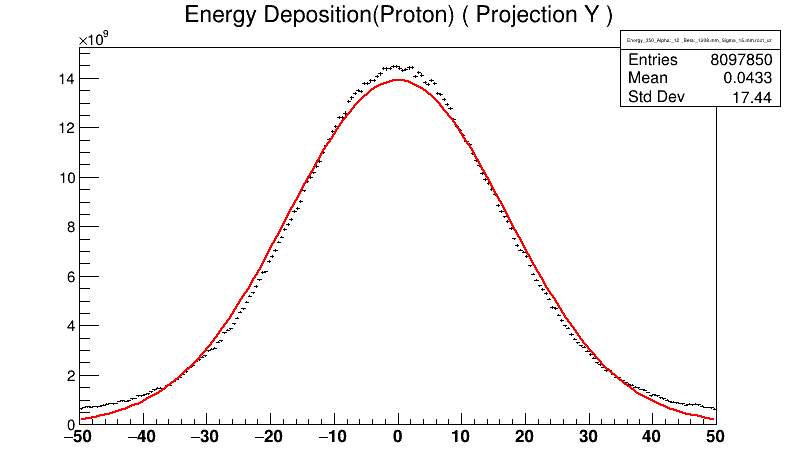

In [4]:
DataFileLocation = "/home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/"

DataFileList = ['Energy_350_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root', 'Energy_350_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root', 'Energy_350_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_16._Beta:_1606.mm_Sigma_15.mm.root', 
                'Energy_350_Alpha:_18._Beta:_1805.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_20._Beta:_2005.mm_Sigma_15.mm.root']

alpha                  = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20] 

sigma_100mm            =  [7.56503, 4.09189, 2.78532, 2.13402, 1.74881, 1.49953, 1.32822, 1.20595, 1.11419, 1.04257]

c1 = TCanvas( 'c1', 'c1', 800, 500 )

i = 5

file = DataFileLocation+DataFileList[i]
DataFile = ROOT.TFile(file)
print(DataFile)
Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(alpha[i]))
Energy.SetDirectory(0)
print(Energy)
name = DataFileList[i]+"_xz"
Distribution = Energy.ProjectionY(name, -200, 200, 1*4, 3*4).Clone(name)
Distribution.Fit("gaus", "M", "SAME")
Distribution.Draw("SAME")

Distribution = Energy.ProjectionY(name, -200, 200, 99*4, 101*4).Clone(name)
Distribution.Fit("gaus", "M", "SAME")
Distribution.Draw("SAME")

Distribution = Energy.ProjectionY(name, -200, 200, 198*4, 200*4).Clone(name)
Distribution.Fit("gaus", "M", "SAME")
Distribution.Draw("SAME")
    
c1.Update()
c1.Draw()

Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 250MeV(Constant area)/Energy_250_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root Title: 
Name: Alpha_0 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 250MeV(Constant area)/Energy_250_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root Title: 
Name: Alpha_1 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 250MeV(Constant area)/Energy_250_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root Title: 
Name: Alpha_2 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 250MeV(Constant area)/Energy_250_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root Title: 
Name: Alpha_3 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 250MeV(Constant area)/Energy_250_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root Title: 
Name: Alpha_4 Title: Energy D

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


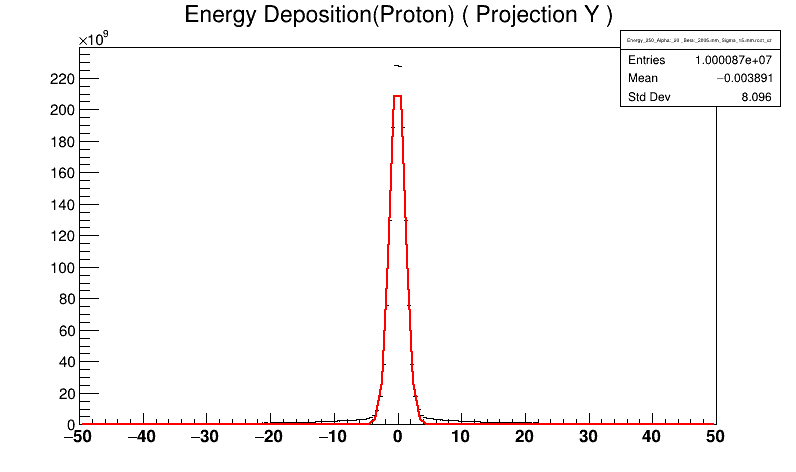

In [13]:
DataFileLocation = "/home/fardousr/Desktop/Output/Convergent_Data/High energy 250MeV(Constant area)/"

DataFileList = ['Energy_250_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root', 'Energy_250_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root',
                'Energy_250_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root', 'Energy_250_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root',
                'Energy_250_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root', 'Energy_250_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root', 
                'Energy_250_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root', 'Energy_250_Alpha:_16._Beta:_1606.mm_Sigma_15.mm.root', 
                'Energy_250_Alpha:_18._Beta:_1805.mm_Sigma_15.mm.root', 'Energy_250_Alpha:_20._Beta:_2005.mm_Sigma_15.mm.root']


alpha                  = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20] 

sigma_100mm            =  [7.56503, 4.09189, 2.78532, 2.13402, 1.74881, 1.49953, 1.32822, 1.20595, 1.11419, 1.04257]
sigma_gaussian =[]
c1 = TCanvas( 'c1', 'c1', 800, 500 )

for i in range(len(DataFileList)):
    file = DataFileLocation+DataFileList[i]
    DataFile = ROOT.TFile(file)
    print(DataFile)
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    print(Energy)
    name = DataFileList[i]+"_xz"
    Distribution = Energy.ProjectionY(name, -200, 200, 99*4, 101*4).Clone(name)
    Distribution.Fit("gaus", "M", "SAME")
    Distribution.Draw("SAME")
    
c1.Update()
c1.Draw()
print(sigma_gaussian)

In [16]:
print(sigma_gaussian[0].GetMatrixArray())

NameError: name 'plotRoot1DHistogram' is not defined

Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 250MeV(Constant area)/Energy_250_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root Title: 
Name: Alpha_1 Title: Energy Deposition(Proton) NbinsX: 200
4.081088563426459
 FCN=365825 FROM HESSE     STATUS=OK             16 CALLS         117 TOTAL
                     EDM=2.32102e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.17854e+10   2.86450e+07   1.71150e+04  -1.21755e-12
   2  Mean        -1.92951e-03   1.35963e-03   8.03077e-05  -9.73725e-02
   3  Sigma        4.08109e+00   1.23007e-03   3.02560e-06   9.68882e+00


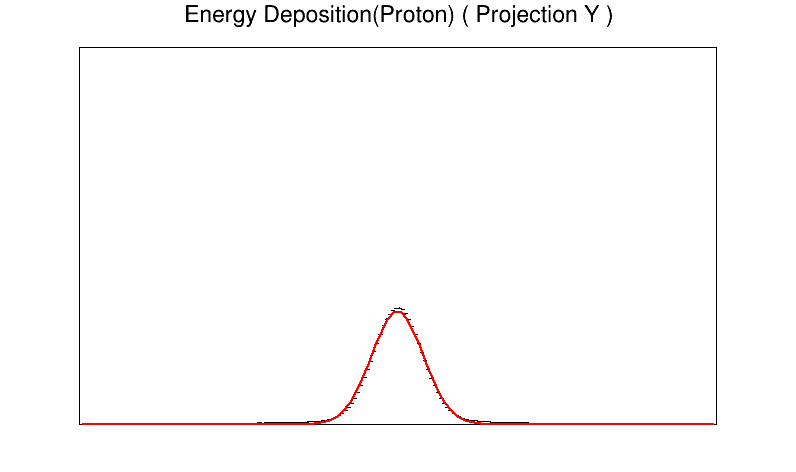

In [25]:
DataFileLocation = "/home/fardousr/Desktop/Output/Convergent_Data/High energy 250MeV(Constant area)/"

DataFileList = ['Energy_250_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root', 'Energy_250_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root',
                'Energy_250_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root', 'Energy_250_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root',
                'Energy_250_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root', 'Energy_250_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root', 
                'Energy_250_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root', 'Energy_250_Alpha:_16._Beta:_1606.mm_Sigma_15.mm.root', 
                'Energy_250_Alpha:_18._Beta:_1805.mm_Sigma_15.mm.root', 'Energy_250_Alpha:_20._Beta:_2005.mm_Sigma_15.mm.root']


i=1

file = DataFileLocation+DataFileList[i]
DataFile = ROOT.TFile(file)
print(DataFile)
Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
Energy.SetDirectory(0)
print(Energy)
name = DataFileList[i]+"_xz"
Distribution = Energy.ProjectionY(name, -200, 200, 99*4, 101*4).Clone(name)
x = Distribution.Fit("gaus", "M", "SAME")
Distribution.Draw("SAME")

parameter = Distribution.GetListOfFunctions().FindObject("gaus");
c = parameter.GetParameter(2)

c1.Update()
c1.Draw()
print(c)

In [26]:
print(c)

4.081088563426459


Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 250MeV(Constant area)//Energy_250_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root Title: 


Warning in <TCanvas::Constructor>: Deleting canvas with same name: can1


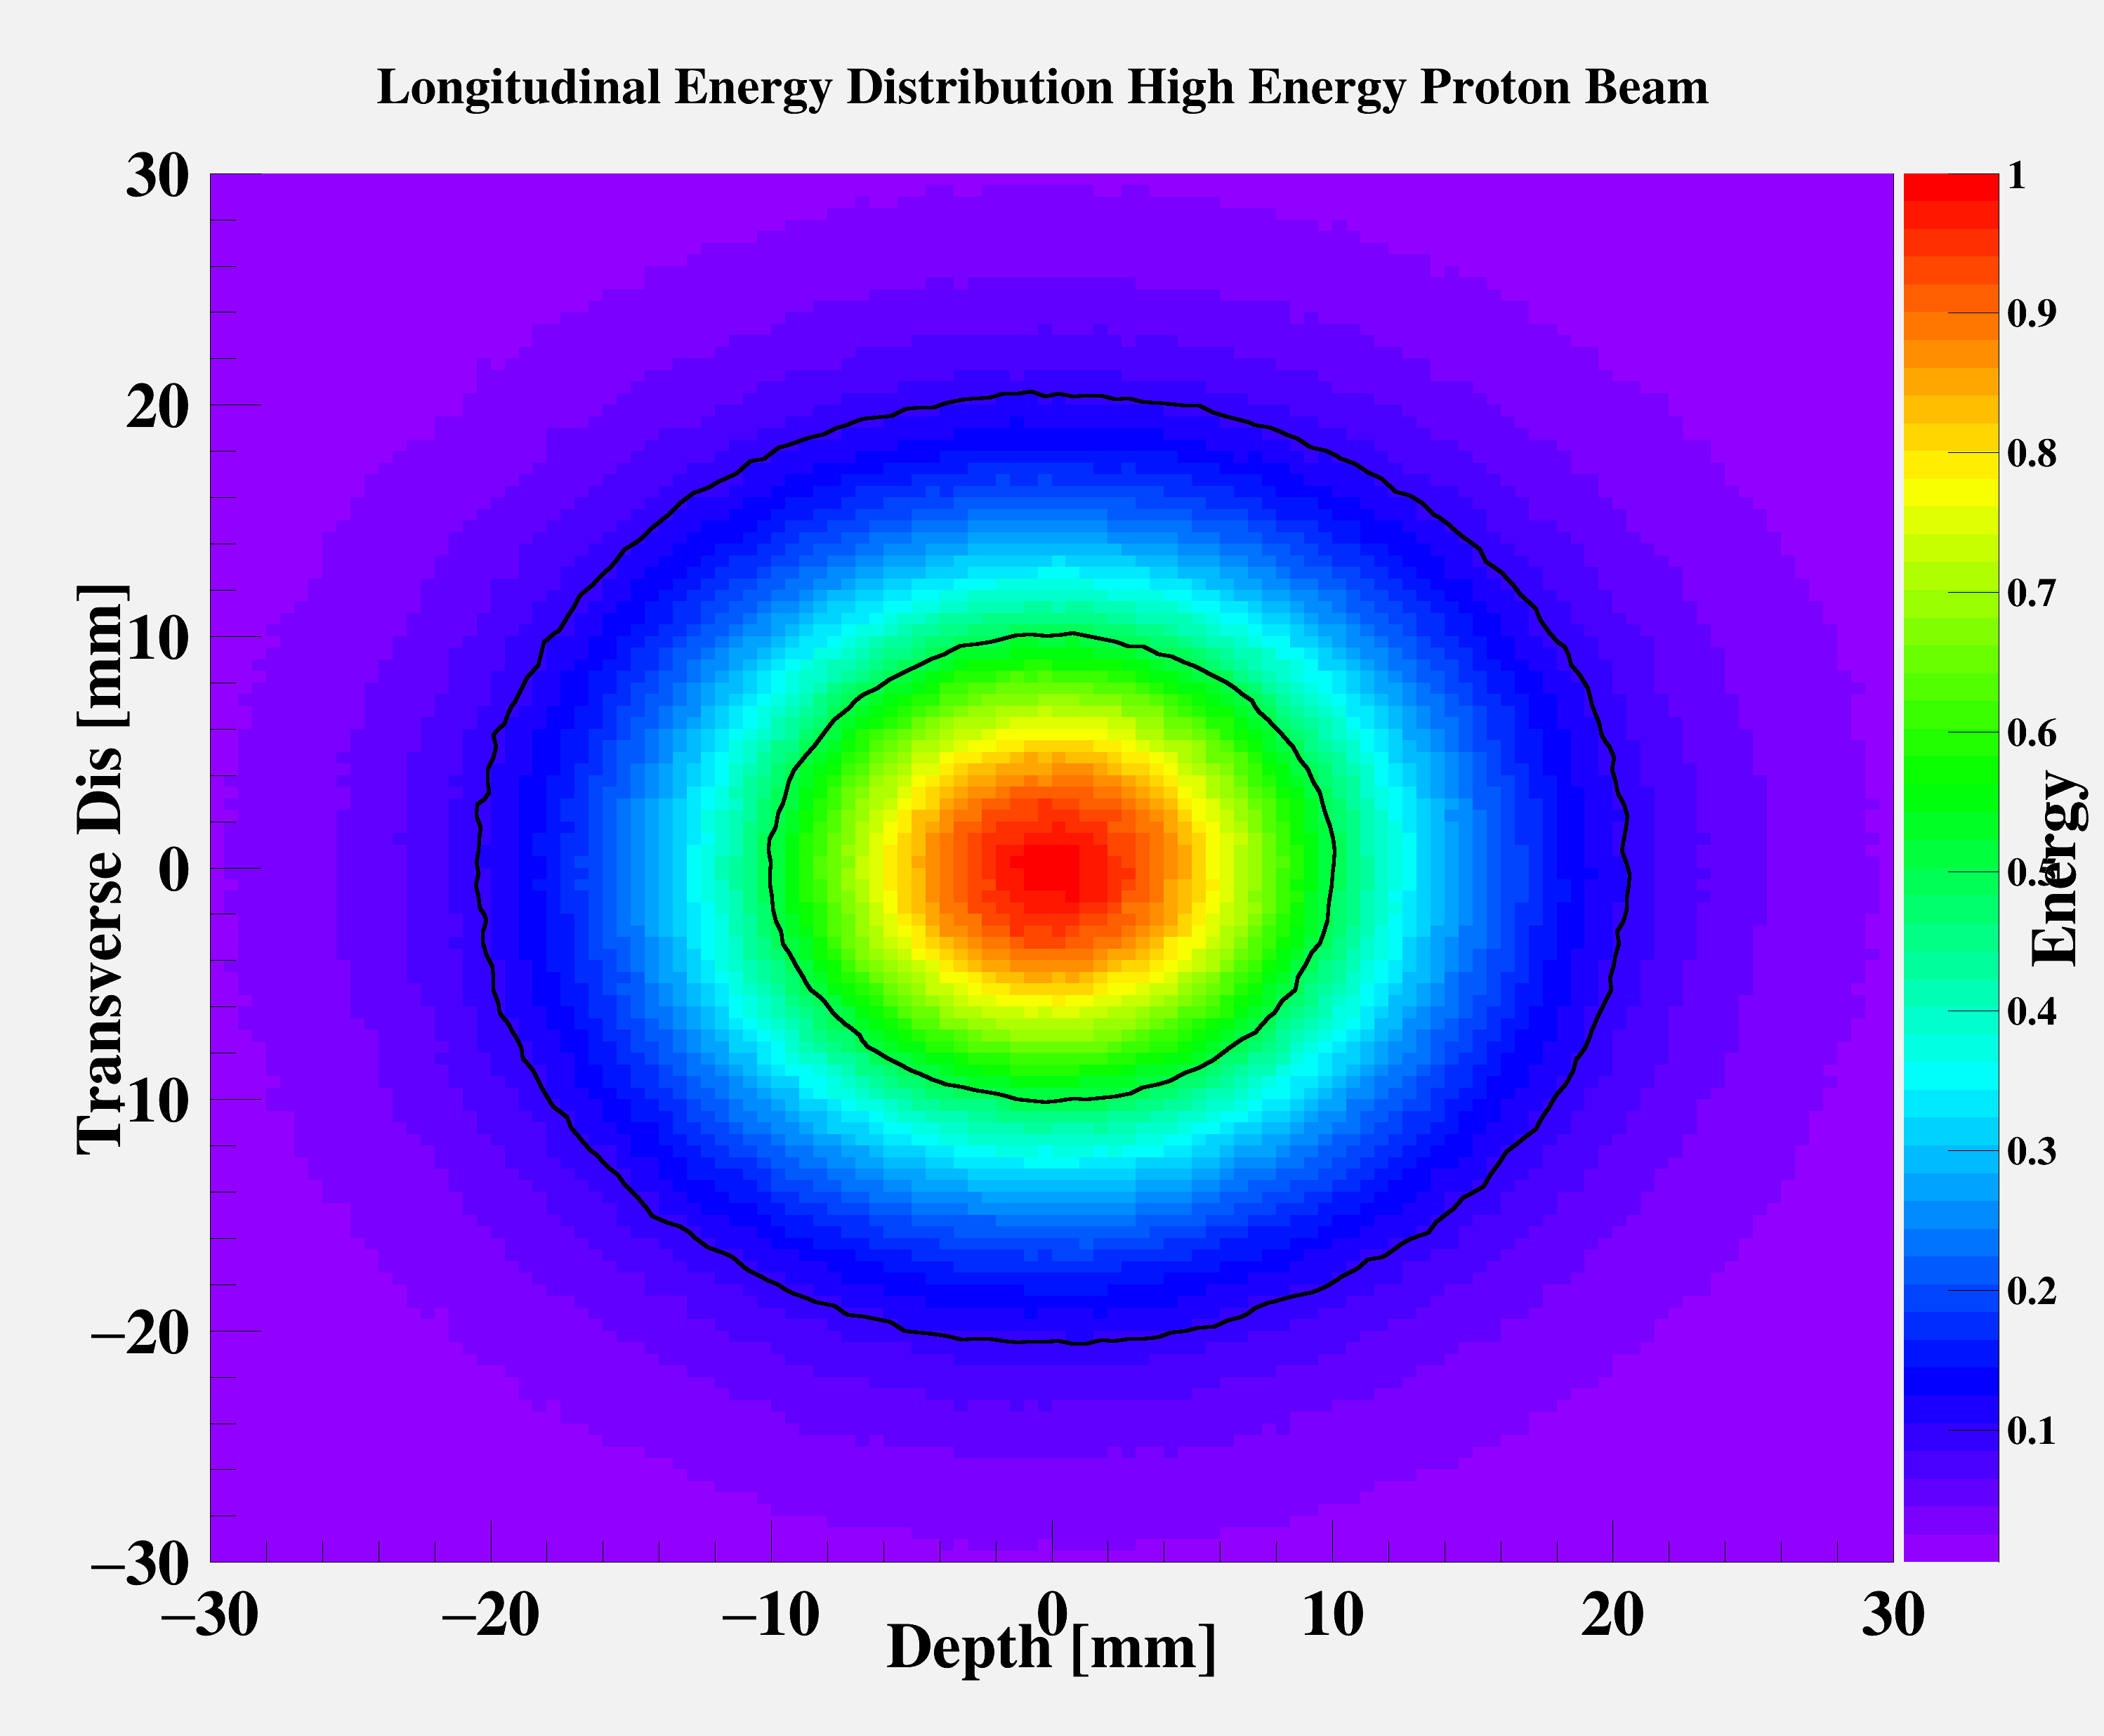

In [75]:
DataFileLocation = "/home/fardousr/Desktop/Output/Convergent_Data/High energy 250MeV(Constant area)/"
DataFileList = ['Energy_250_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root', 'Energy_250_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root',
                'Energy_250_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root', 'Energy_250_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root',
                'Energy_250_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root', 'Energy_250_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root', 
                'Energy_250_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root', 'Energy_250_Alpha:_16._Beta:_1606.mm_Sigma_15.mm.root', 
                'Energy_250_Alpha:_18._Beta:_1805.mm_Sigma_15.mm.root', 'Energy_250_Alpha:_20._Beta:_2005.mm_Sigma_15.mm.root']

i=0
DataFile  = ROOT.TFile(DataFileLocation+"/"+DataFileList[i])
#DataFile  = ROOT.TFile(DataFileLocation+'Data_Size_10mm_Alpha_5_Beta02(150MeV).root')
Energy_XZ = DataFile.Get('ProtonEnergyHisto').Project3D("xy")
print(DataFile)



gStyle.SetPalette(1)
hist = Energy_XZ
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 3000, 2500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )

hist.SetLabelFont   (22,    "x")
hist.SetLabelSize   (0.04,  "x")
hist.SetLabelOffset (0.01,  "x")
hist.SetTitleFont   (22,    "x")
hist.SetTitleSize   (0.04,  "x")
hist.SetTitleOffset (0.8,   "x")
hist.GetXaxis().CenterTitle()
hist.SetXTitle("Depth [mm]")

hist.SetLabelFont   (22,    "y")
hist.SetLabelSize   (0.04,  "y")
hist.SetLabelOffset (0.01,  "y")
hist.SetTitleFont   (22,    "y")
hist.SetTitleSize   (0.04,  "y")
hist.SetTitleOffset (0.8,   "y")
hist.GetYaxis().CenterTitle()
hist.SetYTitle("Transverse Dis [mm]")


hist.SetLabelFont   (22,     "z")
hist.SetLabelSize   (0.025,  "z")
hist.SetLabelOffset (0.004,  "z")
hist.SetTitleFont   (22,     "z")
hist.SetTitleSize   (0.04,   "z")
hist.SetTitleOffset (0.45,   "z")
hist.GetZaxis().CenterTitle()
hist.SetZTitle("Energy")


hist.GetXaxis().SetRangeUser(-30, 30)
hist.GetYaxis().SetRangeUser(-30, 30)


hist.SetTitle("Longitudinal Energy Distribution High Energy Proton Beam")
gStyle.SetTitleFont(22,"")
gStyle.SetTitleFontSize(0.08)


maximum_value = hist.GetBinContent(max_bin)
hist.Scale(1/maximum_value)
hist.SetContour(100)
#hist.SetContourLevel(2, 0.9)
hist.Draw("COLZ")
hist.SetStats(0)

hist_cont = hist.Clone("hist_cont")
hist_cont.SetContour(5)
max_bin = hist_cont.GetMaximumBin()
maximum_value = hist_cont.GetBinContent(max_bin)

contours = []
contours.append(0.5*maximum_value)
contours.append(0.9*maximum_value)


# hist_cont.SetContourLevel(2, 0.8)
# hist_cont.SetContourLevel(3, 0.9)
hist_cont.SetContour(2)
hist_cont.SetLineWidth(5)
hist_cont.SetContourLevel(0, 0.1*maximum_value)
hist_cont.SetContourLevel(1, 0.5*maximum_value)
# hist_cont.SetContourLevel(2, 0.7*maximum_value)
# hist_cont.SetContourLevel(3, 0.9*maximum_value)


hist_cont.Draw("CONT3 SAME")
hist_cont.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()
# can1.Print("Energy_250MeV_Alpha_5.png");

In [17]:
DataFileLocation = "/home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/"

DataFileList = ['Energy_350_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root', 'Energy_350_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root', 'Energy_350_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_16._Beta:_1606.mm_Sigma_15.mm.root', 
                'Energy_350_Alpha:_18._Beta:_1805.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_20._Beta:_2005.mm_Sigma_15.mm.root']


Energy_Distribution      =  []
Energy_Distribution_CONT =  []
num_proton               =  []

for i in range(0, 9):#len(DataFileList)):
    print(DataFileList[i])
    file = DataFileLocation+"/"+DataFileList[i]
    DataFile = ROOT.TFile(file)
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    
#     Energy_z_projection = Energy.ProjectionZ("name_total_z_projection", 1, 200, 1, 200).Clone("name_total_z_projection")
#     Max_Bin = Energy_z_projection.GetMaximumBin()
    Energy.GetZaxis().SetRange(396, 404);
    name = DataFileList[i]+"_xy"
    Distribution = Energy.Project3D("xy").Clone(name)
    Distribution.SetDirectory(0)
    Distribution1 = Energy.Project3D("xy").Clone(name+"COLZ")
    Distribution1.SetDirectory(0)
    Energy_Distribution.append(Distribution)
    Energy_Distribution_CONT.append(Distribution1)

Energy_350_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root
Energy_350_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root
Energy_350_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root
Energy_350_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root
Energy_350_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root
Energy_350_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root
Energy_350_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root
Energy_350_Alpha:_16._Beta:_1606.mm_Sigma_15.mm.root
Energy_350_Alpha:_18._Beta:_1805.mm_Sigma_15.mm.root


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cs
Info in <TCanvas::Print>: png file /home/fardousr/Desktop/Output/Graphs/Transverse CONT(50% and 90%) Plot High Energy (350MeV) at waist .png has been created


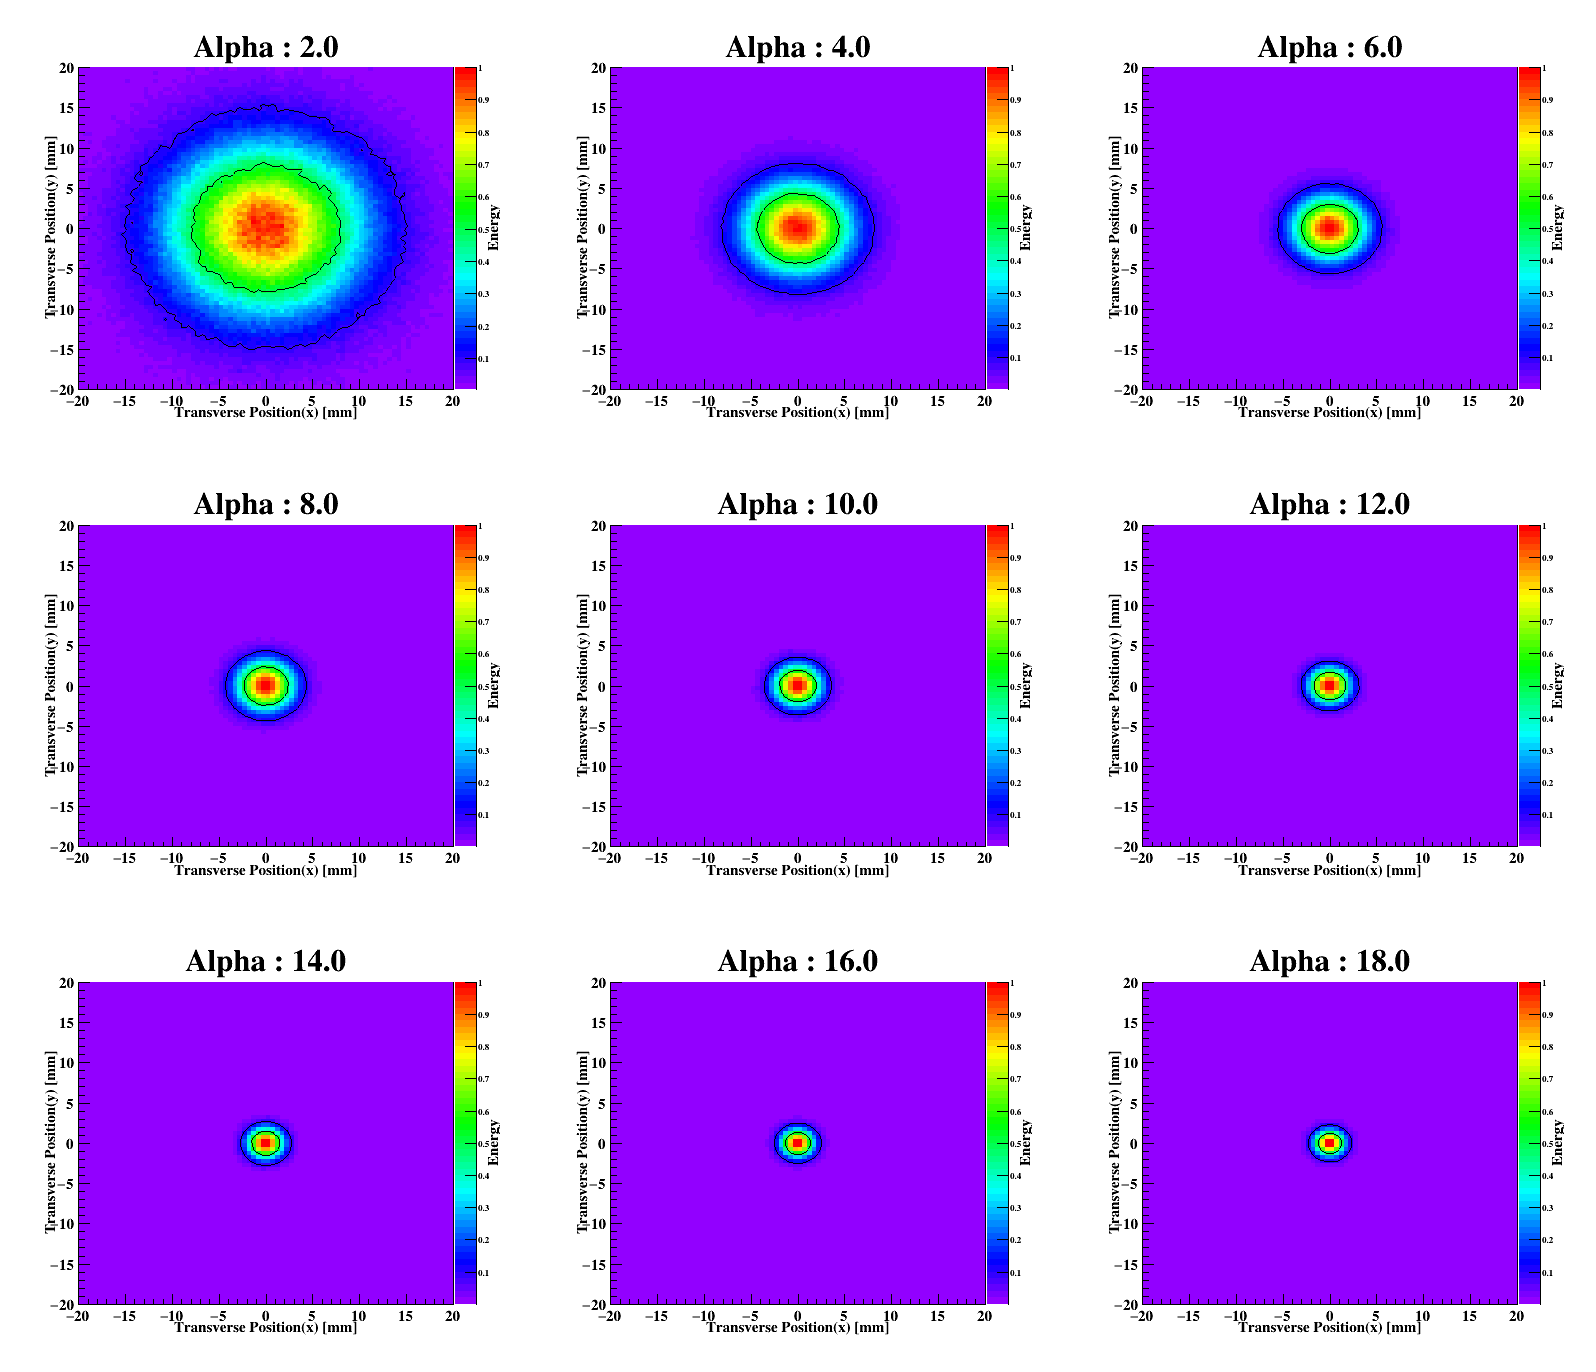

In [18]:
cs = TCanvas("cs","cs",1600,1400)
gStyle.SetPalette(1)
cs.Divide(3,3, 0.02, 0.02)
Alpha = ["2.0", "4.0", "6.0", "8.0", "10.0", "12.0", "14.0", "16.0", "18.0", "20.0"]

radius150             = [0.5, 1.0, 2.0, 3.0, 4.0, 6.0, 8.0, 10.0] 
radius100 = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 8.0, 10.0]
for i in range(0,9):
    cs.cd(i+1);
    cs.SetFillColor( 0 )
    cs.GetFrame().SetFillColor( 21 )
    cs.GetFrame().SetBorderSize( 6 )
    cs.GetFrame().SetBorderMode( -1 )
    
    Histogram = Energy_Distribution[i]
    
    maxvalue = Histogram.GetMaximum();
    Histogram.Scale(1/maxvalue)

    Histogram.GetXaxis().SetRangeUser( -20, 20);
    Histogram.GetYaxis().SetRangeUser(-20, 20);
    
    Histogram.SetLabelFont   (22,    "x")
    Histogram.SetLabelSize   (0.04,  "x")
    Histogram.SetLabelOffset (0.01,  "x")
    Histogram.SetTitleFont   (22,    "x")
    Histogram.SetTitleSize   (0.04,  "x")
    Histogram.SetTitleOffset (0.9,   "x")
    Histogram.GetXaxis().CenterTitle()
    Histogram.SetXTitle("Transverse Position(x) [mm]")

    Histogram.SetLabelFont   (22,    "y")
    Histogram.SetLabelSize   (0.04,  "y")
    Histogram.SetLabelOffset (0.01,  "y")
    Histogram.SetTitleFont   (22,    "y")
    Histogram.SetTitleSize   (0.04,  "y")
    Histogram.SetTitleOffset (0.9,   "y")
    Histogram.GetYaxis().CenterTitle()
    Histogram.SetYTitle("Transverse Position(y) [mm]")

    Histogram.SetLabelFont   (22,     "z")
    Histogram.SetLabelSize   (0.025,  "z")
    Histogram.SetLabelOffset (0.004,  "z")
    Histogram.SetTitleFont   (22,     "z")
    Histogram.SetTitleSize   (0.04,   "z")
    Histogram.SetTitleOffset (0.6,   "z")
    Histogram.GetZaxis().CenterTitle()
    Histogram.SetZTitle("Energy")
    
    Title = "Alpha : "+Alpha[i]#str(radius150[i])
    
    Histogram.SetTitle(Title)
    gStyle.SetTitleFont(22,"")
    gStyle.SetTitleFontSize(0.08)
    
    Histogram.SetContour(100)
    Histogram.Draw("COLZ")
    Histogram.SetStats(0)
    
    Histogram1 = Energy_Distribution_CONT[i]
    maxvalue1 = Histogram1.GetMaximum();
    
    Histogram1.SetContour(2)
    Histogram1.SetLineWidth(1)
    Histogram1.SetContourLevel(0, 0.1*maxvalue1)
    Histogram1.SetContourLevel(1, 0.5*maxvalue1)
    Histogram1.Draw("CONT3 SAME")
    cs.SetRightMargin(0.9)
    cs.SetLeftMargin(0.25)
    cs.SetBottomMargin(0.25)
    cs.Modified()
    cs.Update()
cs.Draw()
cs.Print("/home/fardousr/Desktop/Output/Graphs/Transverse CONT(50% and 90%) Plot High Energy (350MeV) at waist .png") 

Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 250MeV(Constant area)//Energy_250_Alpha:_20._Beta:_2005.mm_Sigma_15.mm.root Title: 


Warning in <TCanvas::Constructor>: Deleting canvas with same name: can1


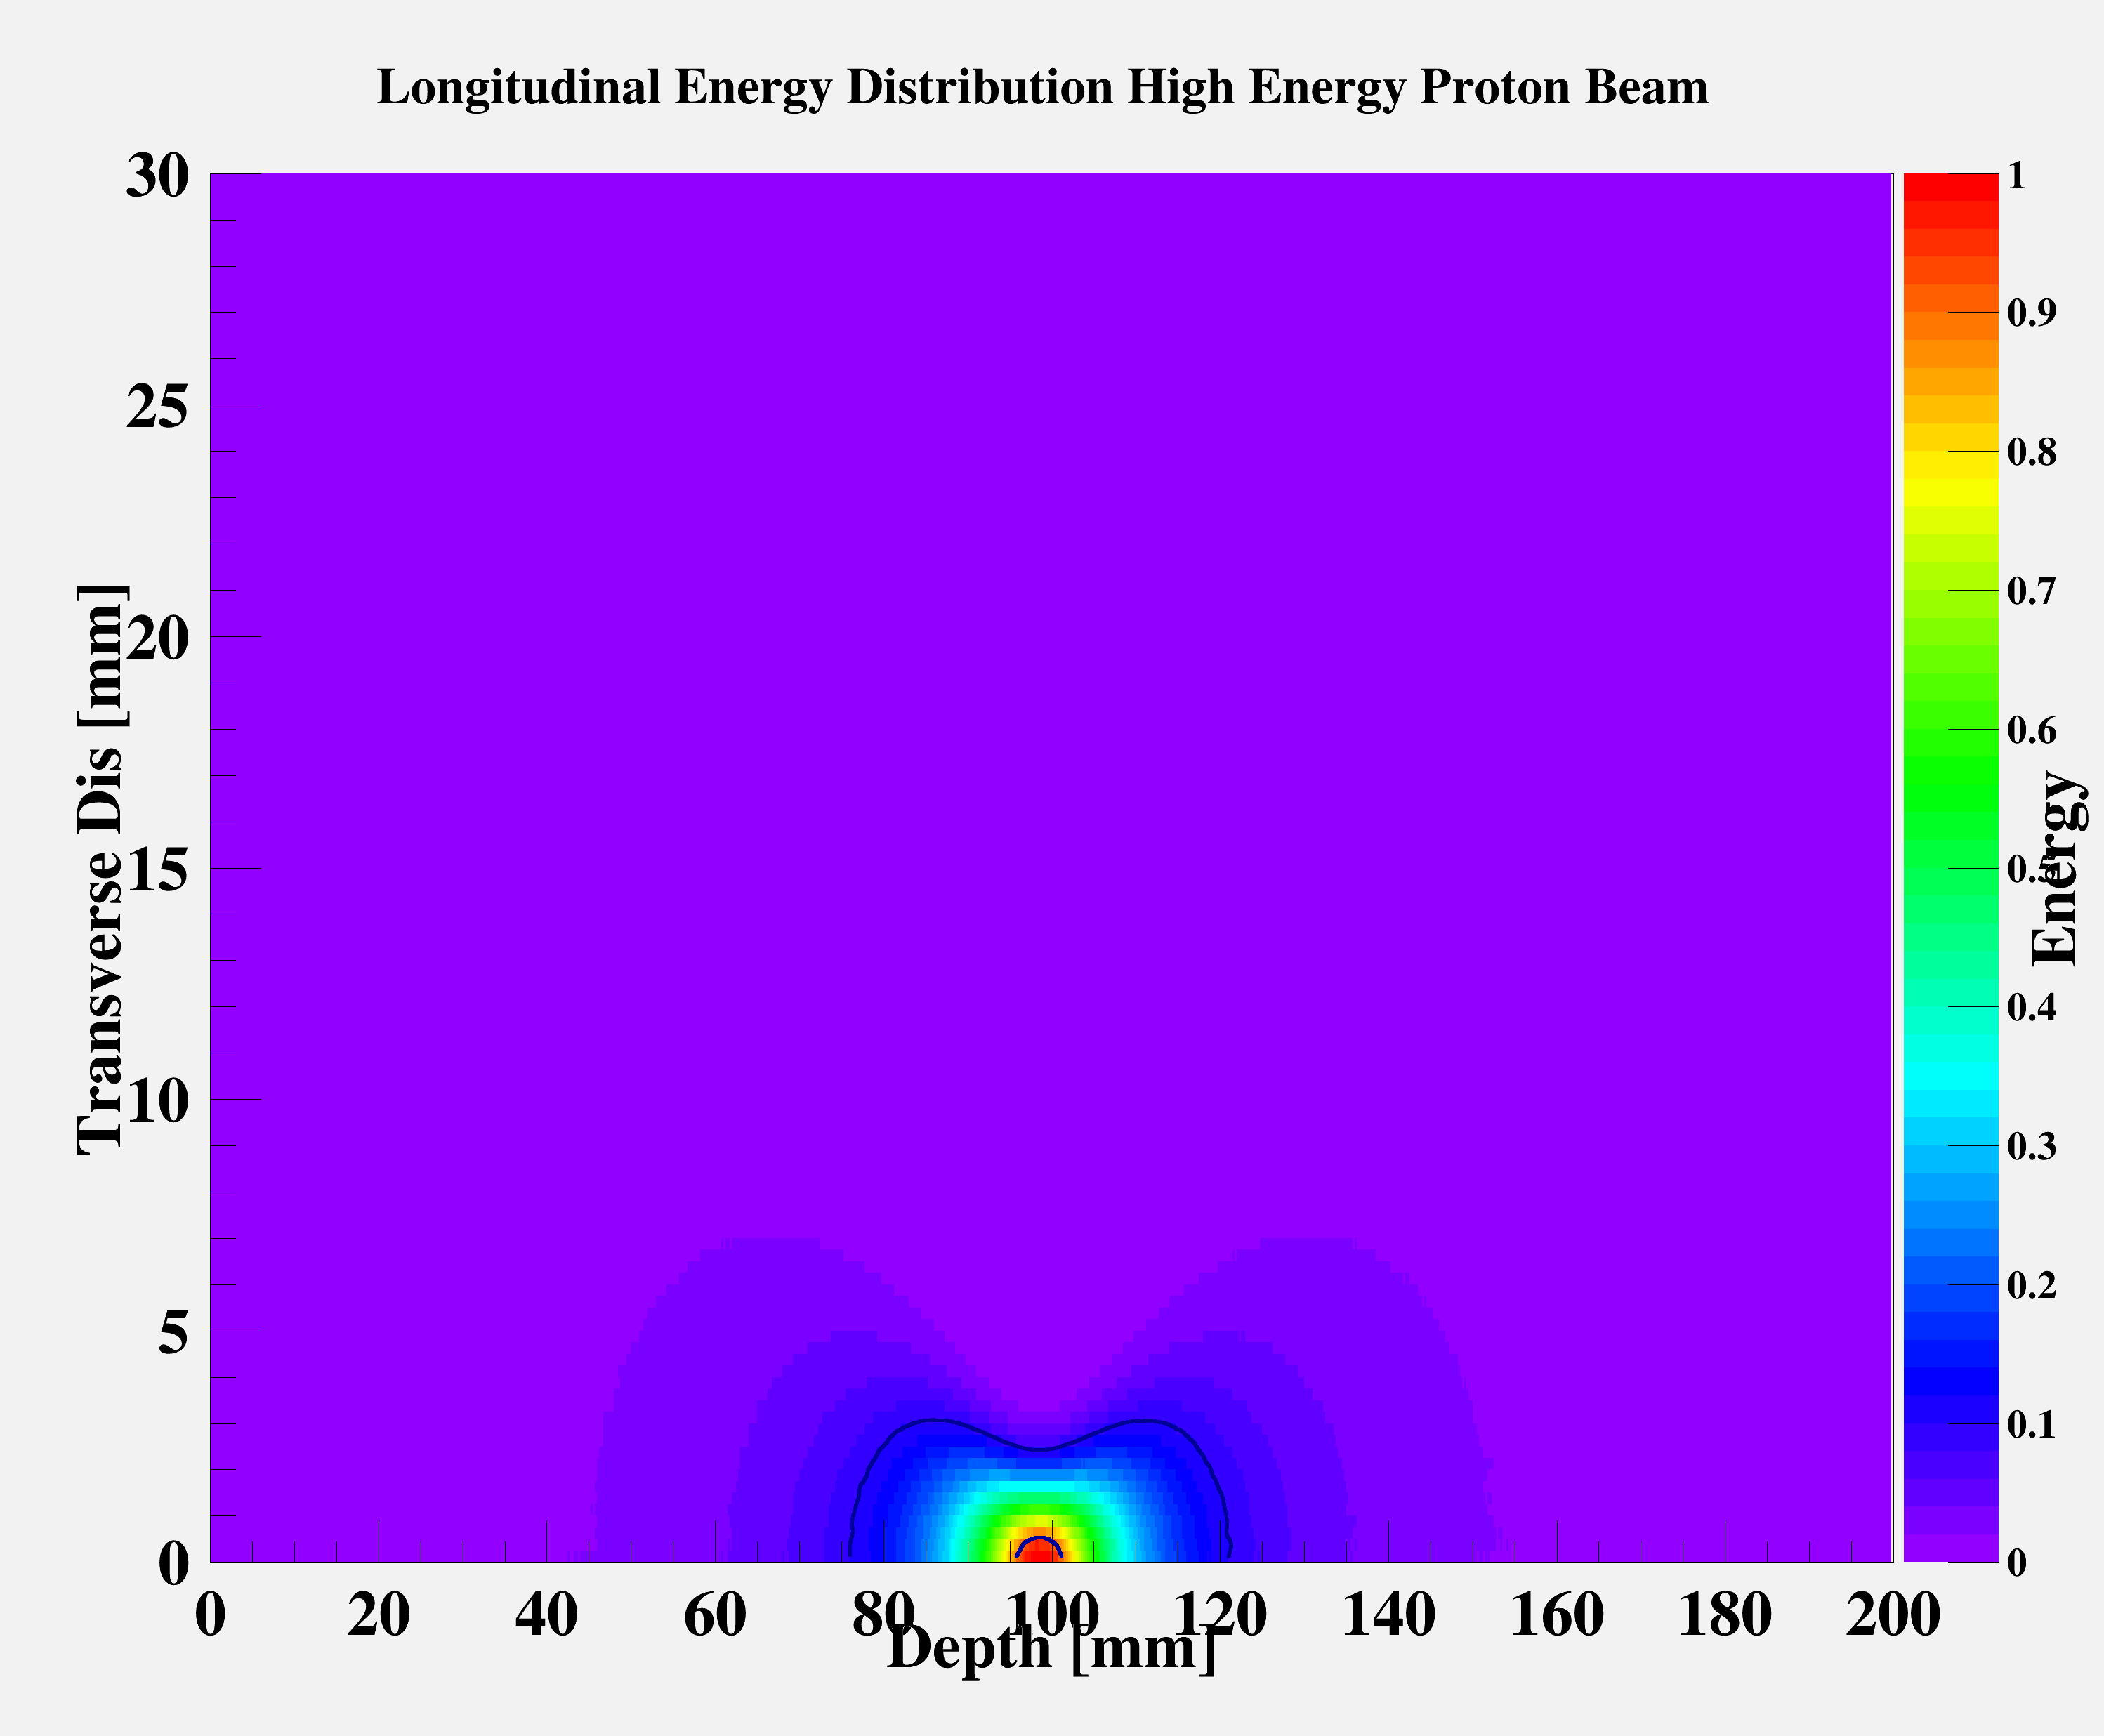

In [14]:
DataFileLocation = "/home/fardousr/Desktop/Output/Convergent_Data/High energy 250MeV(Constant area)/"
DataFileList = ['Energy_250_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root', 'Energy_250_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root',
                'Energy_250_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root', 'Energy_250_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root',
                'Energy_250_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root', 'Energy_250_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root', 
                'Energy_250_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root', 'Energy_250_Alpha:_16._Beta:_1606.mm_Sigma_15.mm.root', 
                'Energy_250_Alpha:_18._Beta:_1805.mm_Sigma_15.mm.root', 'Energy_250_Alpha:_20._Beta:_2005.mm_Sigma_15.mm.root']

i=9
DataFile  = ROOT.TFile(DataFileLocation+"/"+DataFileList[i])
#DataFile  = ROOT.TFile(DataFileLocation+'Data_Size_10mm_Alpha_5_Beta02(150MeV).root')
Energy_XZ = DataFile.Get('ProtonRadialHisto')
print(DataFile)

hist = TH2D("H2", "h2", 800, 0, 200, 200, 0, 50)
lenght = 0.25/1000       #m

for i in range(1,800):
    for j in range(1,200):
        radius1       = j*0.25
        radius2       = (j-1)*0.25
        bin_volume =(mt.pi*(radius1/1000)**2*lenght) - (mt.pi*(radius2/1000)**2*lenght)  
        mass = bin_volume*997
        Bin_number = Energy_XZ.GetBin(i,j);
#         print(Bin_number)
        Bin_Energy = Energy_XZ.GetBinContent(Bin_number)
        Bin_Dose   = (Bin_Energy*1.60218*10**-19)/mass
#         print(Bin_Dose)
        hist.SetBinContent(Bin_number, Bin_Dose)


gStyle.SetPalette(1)
# hist = Energy_XZ
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 3000, 2500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )

hist.SetLabelFont   (22,    "x")
hist.SetLabelSize   (0.04,  "x")
hist.SetLabelOffset (0.01,  "x")
hist.SetTitleFont   (22,    "x")
hist.SetTitleSize   (0.04,  "x")
hist.SetTitleOffset (0.8,   "x")
hist.GetXaxis().CenterTitle()
hist.SetXTitle("Depth [mm]")

hist.SetLabelFont   (22,    "y")
hist.SetLabelSize   (0.04,  "y")
hist.SetLabelOffset (0.01,  "y")
hist.SetTitleFont   (22,    "y")
hist.SetTitleSize   (0.04,  "y")
hist.SetTitleOffset (0.8,   "y")
hist.GetYaxis().CenterTitle()
hist.SetYTitle("Transverse Dis [mm]")


hist.SetLabelFont   (22,     "z")
hist.SetLabelSize   (0.025,  "z")
hist.SetLabelOffset (0.004,  "z")
hist.SetTitleFont   (22,     "z")
hist.SetTitleSize   (0.04,   "z")
hist.SetTitleOffset (0.45,   "z")
hist.GetZaxis().CenterTitle()
hist.SetZTitle("Energy")


hist.GetXaxis().SetRangeUser(0, 200)
hist.GetYaxis().SetRangeUser(0, 30)


hist.SetTitle("Longitudinal Energy Distribution High Energy Proton Beam")
gStyle.SetTitleFont(22,"")
gStyle.SetTitleFontSize(0.08)

max_bin = hist.GetMaximumBin()
maximum_value = hist.GetBinContent(max_bin)
hist.Scale(1/maximum_value)
hist.SetContour(100)
#hist.SetContourLevel(2, 0.9)
hist.Draw("COLZ")
hist.SetStats(0)

hist_cont = hist.Clone("hist_cont")
hist_cont.SetContour(5)
max_bin = hist_cont.GetMaximumBin()
maximum_value = hist_cont.GetBinContent(max_bin)

contours = []
contours.append(0.5*maximum_value)
contours.append(0.9*maximum_value)


# hist_cont.SetContourLevel(2, 0.8)
# hist_cont.SetContourLevel(3, 0.9)
hist_cont.SetContour(2)
hist_cont.SetLineWidth(5)
hist_cont.SetContourLevel(0, 0.1*maximum_value)
hist_cont.SetContourLevel(1, 0.9*maximum_value)
# hist_cont.SetContourLevel(2, 0.7*maximum_value)
# hist_cont.SetContourLevel(3, 0.9*maximum_value)


hist_cont.Draw("CONT3 SAME")
hist_cont.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()
# can1.Print("Energy_250MeV_Alpha_5.png");

In [20]:
can1 = TCanvas( 'can1', 'Longitudinal Dose Deposition by Proton', 800, 500)
gROOT.Reset()
gStyle.SetTextFont(1)
gStyle.SetPalette(1)

plt.rcdefaults()
params = {'figure.figsize'   : (8, 5),
          'legend.fontsize'  : 12,
          'axes.labelsize'   : 14,
          'axes.titlesize'   : 14,
          'xtick.labelsize'  : 14,
          'ytick.labelsize'  : 14,
          'axes.facecolor'   : 'white'}
pylab.rcParams.update(params)

DataFileLocation_150MeV = "/home/fardousr/Desktop/Output/Collimator_Data/Energy Histogram 150MeV/"
DataFileList_150MeV = [ 'Coll_Energy_150MeV_Radius_0.5mm.root', 'Coll_Energy_150MeV_Radius_1.0mm.root', 
                        'Coll_Energy_150MeV_Radius_2.0mm.root', 'Coll_Energy_150MeV_Radius_3.0mm.root', 
                        'Coll_Energy_150MeV_Radius_4.0mm.root', 'Coll_Energy_150MeV_Radius_6.0mm.root', 
                        'Coll_Energy_150MeV_Radius_8.0mm.root', 'Coll_Energy_150MeV_Radius_10.mm.root']


Histograms = []

i = 3
  
depth = []
sigma = []

Source_file = DataFileLocation_150MeV+DataFileList_150MeV[i]
RootDataFile = ROOT.TFile(Source_file)
Energy = RootDataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
Energy.SetDirectory(0)
name_total_z_projection = DataFileList_150MeV[i]+"z projection"
Energy_z_projection = Energy.ProjectionZ(name_total_z_projection, -200, 200, 1*4, 200*4).Clone(name_total_z_projection)
Max_Bin = Energy_z_projection.GetMaximumBin()

for j in range(20, Max_Bin, 40):
    name_BP_z_projection = DataFileList_150MeV[i]+"z projection BP"
    Distribution = Energy.ProjectionY(name_BP_z_projection, -200, 200, j-4, j+4).Clone(name_BP_z_projection)
#     Distribution.Fit("gaus", "M", "SAME")
#     Distribution.Draw("SAME")
    Histograms.append(Distribution)
    print(j/4)

Distribution = Energy.ProjectionY(name_BP_z_projection, -200, 200, Max_Bin-4, Max_Bin+4).Clone(name_BP_z_projection)
Histograms.append(Distribution)

5.0
15.0
25.0
35.0
45.0
55.0
65.0
75.0
85.0
95.0
105.0
115.0
125.0
135.0
145.0
155.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: can1


 FCN=1.16265e+06 FROM HESSE     STATUS=OK             16 CALLS         119 TOTAL
                     EDM=5.64406e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.53355e+11   8.14027e+07   6.04046e+04  -5.58905e-14
   2  Mean         7.48884e-03   4.27287e-04   8.99764e-06  -2.65238e-03
   3  Sigma        1.40940e+00   2.47487e-04   9.10210e-07  -2.20469e+00
 FCN=920661 FROM HESSE     STATUS=OK             16 CALLS         113 TOTAL
                     EDM=3.44253e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.55267e+11   8.28786e+07   6.08605e+04  -3.40483e-12
   2  Mean         5.70003e-03   4.50702e-04   4.22301e-05   3.65000e-01
   3  Sigma        1.47758e+00

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cs


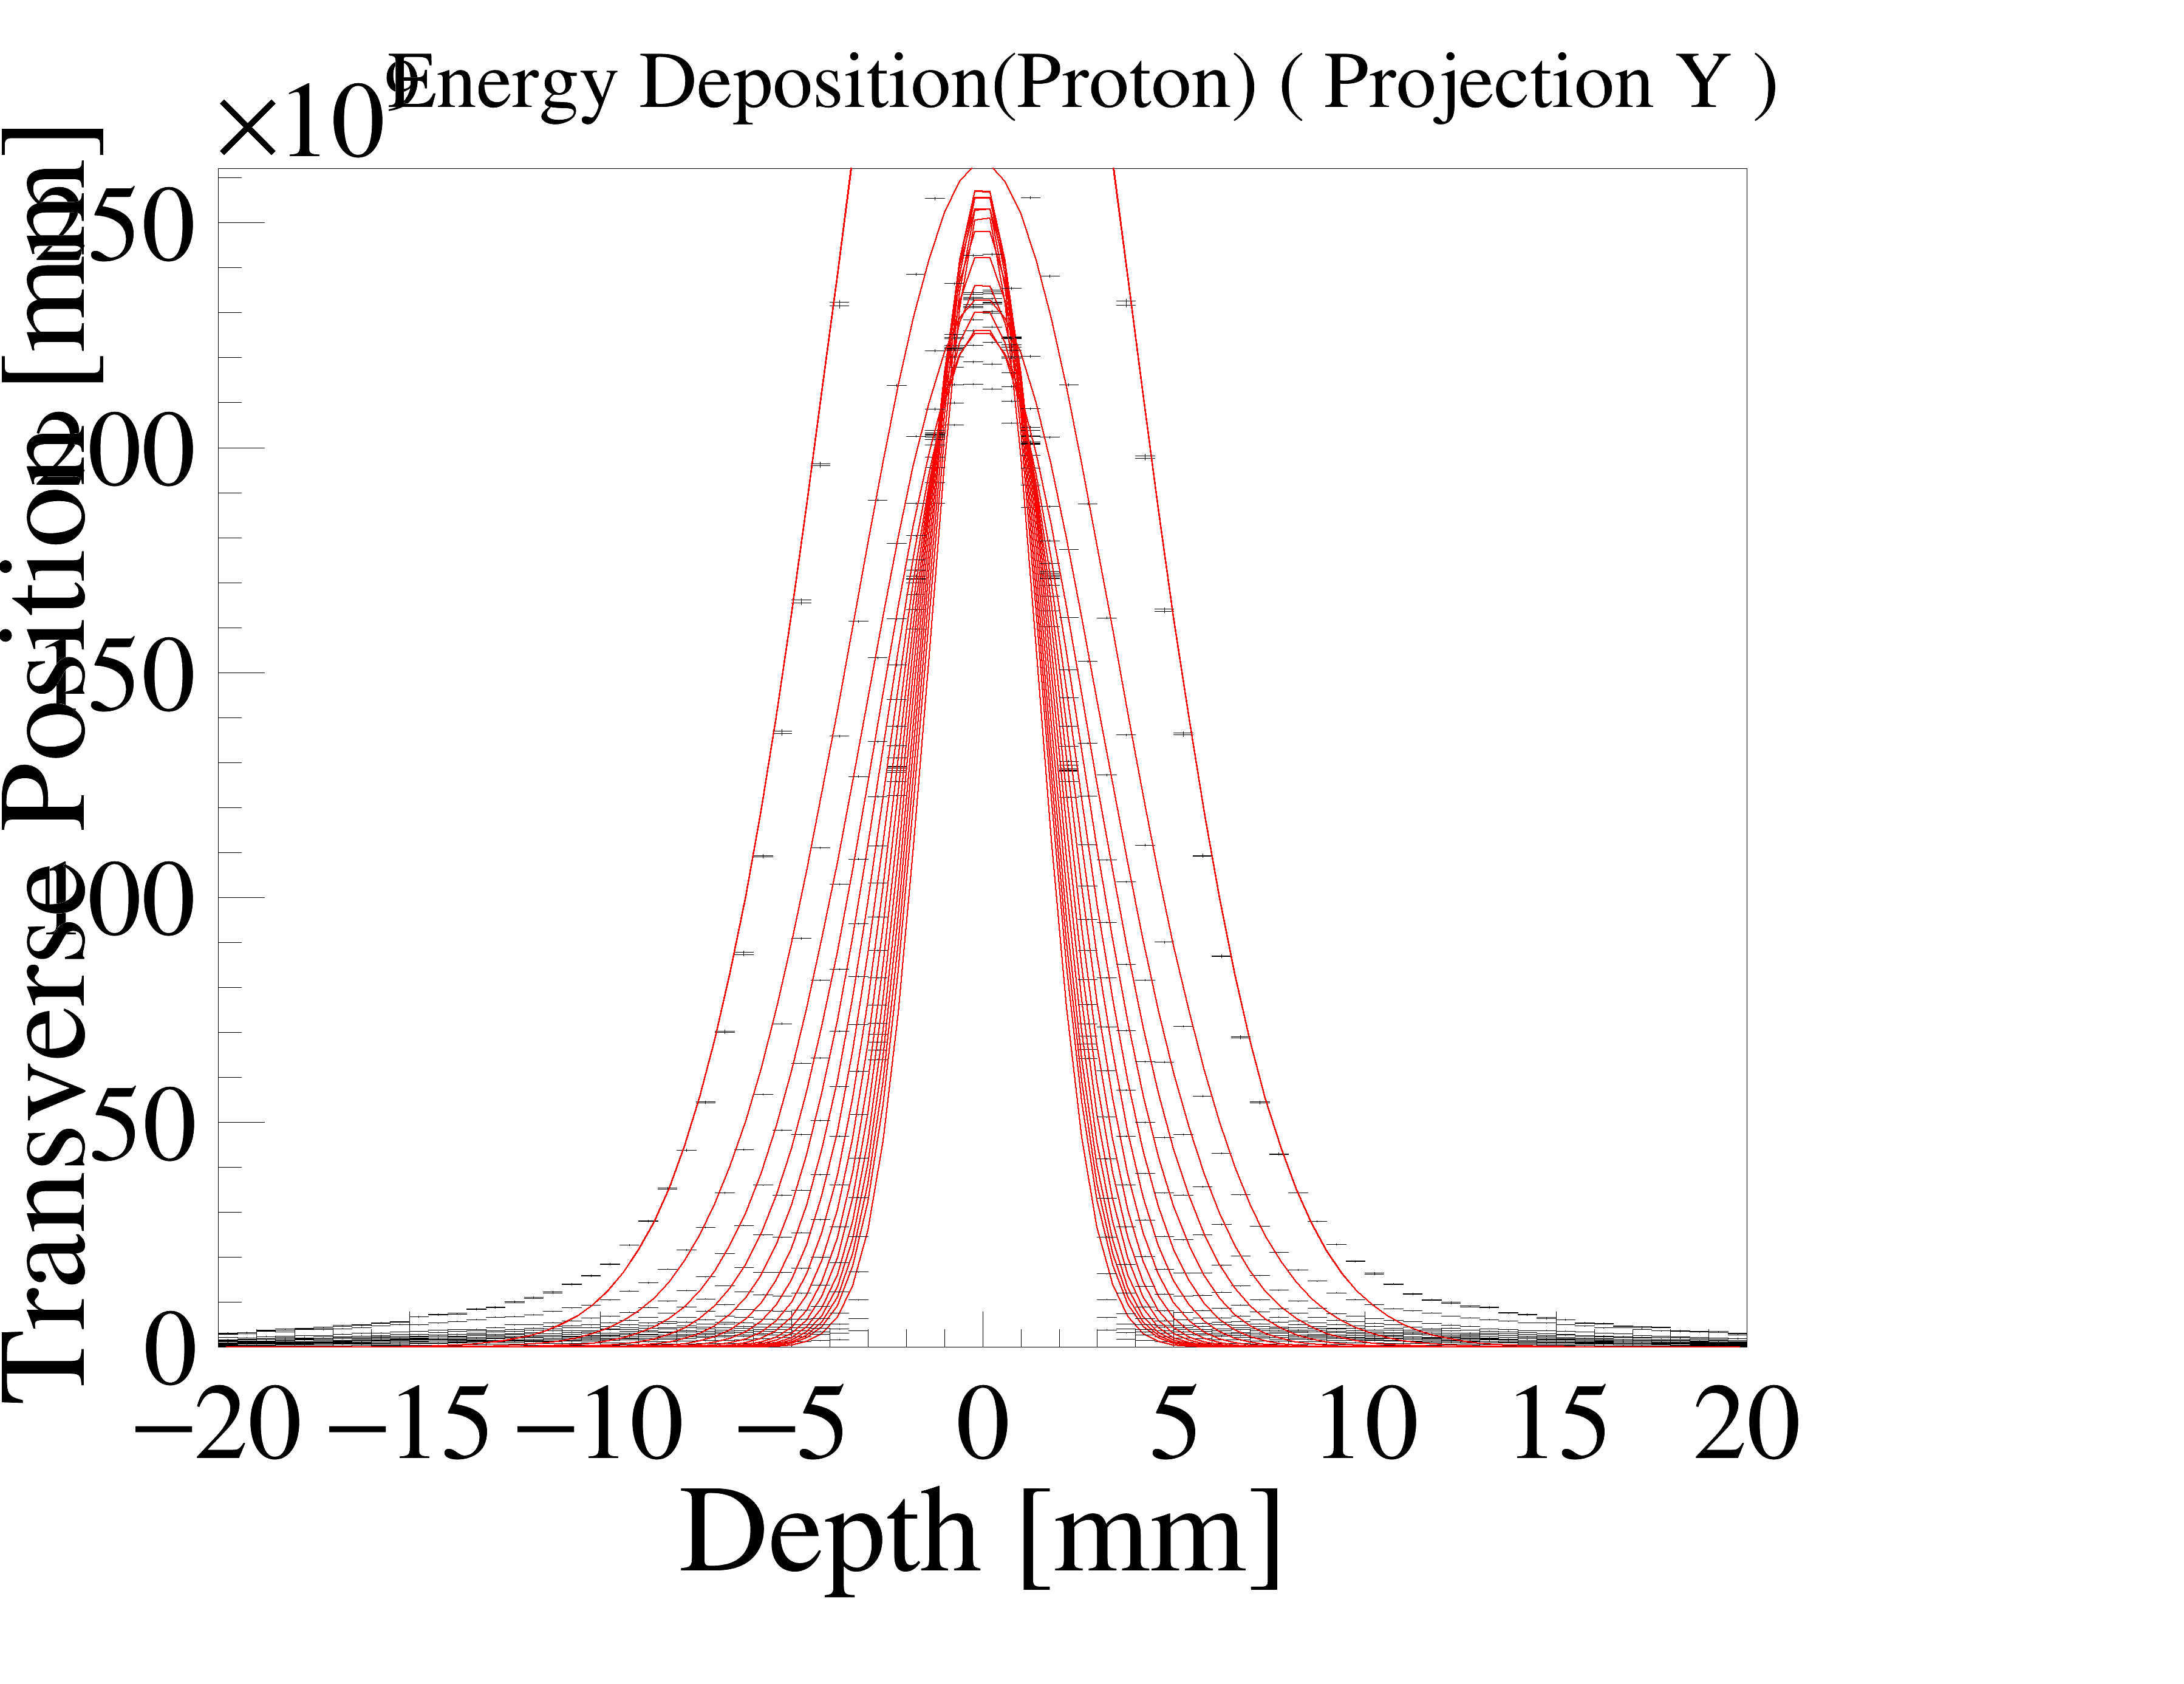

In [21]:
cs = TCanvas("cs","cs", 3600,2800)
gROOT.Reset()
gStyle.SetPalette(1)
Radius = ["0.5", "1.0", "2.0", "3.0", "4.0", "6.0", "8.0", "10.0"]

for i in range(0,len(Histograms)):
    cs.SetRightMargin  (0.20)
    cs.SetLeftMargin   (0.10)
    cs.SetBottomMargin (0.20)
    
    hist = Histograms[i]
    
    
    hist.SetLabelFont   (132,    "x")
    hist.SetLabelSize   (0.07,  "x")
    hist.SetLabelOffset (0.01,  "x")
    hist.SetTitleFont   (132,    "x")
    hist.SetTitleSize   (0.08,  "x")
    hist.SetTitleOffset (0.9,   "x")
    hist.GetXaxis().CenterTitle()
    hist.SetXTitle("Depth [mm]")

    hist.SetLabelFont   (132,    "y")
    hist.SetLabelSize   (0.07,  "y")
    hist.SetLabelOffset (0.01,  "y")
    hist.SetTitleFont   (132,    "y")
    hist.SetTitleSize   (0.08,  "y")
    hist.SetTitleOffset (0.6,   "y")
    hist.GetYaxis().CenterTitle()
    hist.SetYTitle("Transverse Dis [mm]")

    hist.GetXaxis().SetTitle("Depth [mm]");
    hist.GetYaxis().SetTitle("Transverse Position [mm]")
    hist.SetContour(100)
#     hist.GetXaxis().SetRangeUser(0, 167)
    hist.GetXaxis().SetRangeUser(-20, 20)
    gStyle.SetTitleFont(132,"")
    gStyle.SetTitleFontSize(0.08)
    hist.Fit("gaus", "M", "SAME")
    hist.Draw("SAME")
    hist.SetStats(0)

    cs.Modified()
    cs.Update()    
#cs.Print("/home/fardousr/Desktop/Output/Graphs/Physical Dose 150MeV different Collimator radii.png") 
cs.Draw()

In [ ]:
DataFileLocation =      "/home/fardousr/Desktop/Output/Collimator_Data/Energy Histogram 150MeV/"
DataFileList =        [ 'Coll_Energy_150MeV_Radius_0.5mm.root', 'Coll_Energy_150MeV_Radius_1.0mm.root', 
                        'Coll_Energy_150MeV_Radius_2.0mm.root', 'Coll_Energy_150MeV_Radius_3.0mm.root', 
                        'Coll_Energy_150MeV_Radius_4.0mm.root', 'Coll_Energy_150MeV_Radius_6.0mm.root', 
                        'Coll_Energy_150MeV_Radius_8.0mm.root', 'Coll_Energy_150MeV_Radius_10.mm.root']

i=3
file = DataFileLocation+"/"+DataFileList[i]
DataFile = ROOT.TFile(file)

NumProton = DataFile.Get('ParticelCounter').GetBinContent(1)
Energy_RZ = DataFile.Get('ProtonRadialHisto').Clone("Energy_RZ")
Energy_RZ.SetDirectory(0)
Energy_RZ.Scale(1/NumProton)
nBInsX = Energy_RZ.GetNbinsX()
nBInsY = Energy_RZ.GetNbinsY()
print(nBInsX, nBInsY)

Dose_RZ = TH2D("Dose_RZ", "Dose_RZ", 800, 0, 200, 200, 0, 50)
lenght = 0.25/1000       #m

for i in range(1,801):
    for j in range(1,201):
        radius1       =     j*0.25
        radius2       = (j-1)*0.25
        bin_volume =(mt.pi*(radius1/1000)**2*lenght) - (mt.pi*(radius2/1000)**2*lenght)  
        mass = bin_volume*997
        Bin_number = Energy_RZ.GetBin(i,j);
        Bin_Energy = Energy_RZ.GetBinContent(Bin_number)
        Bin_Dose   = (Bin_Energy*1.60218*10**-19)/(mass)
        Energy_RZ.SetBinContent(Bin_number, Bin_Dose)
#         Energy_RZ.SetBinError(Bin_number, 0.01*Bin_Dose)

# Energy_RZ.GetXaxis().SetRange(4*156, 4*156)

Dose_y_projection = Energy_RZ.ProjectionY("Dose_projection", 621,621, "d").Clone("Dose_y_projection")
Dose_y_projection.SetDirectory(0)
nBInsX = Dose_y_projection.GetNbinsX()
nBInsY = Dose_y_projection.GetNbinsY()
print(nBInsX, nBInsY)
Dose = []
Radial_Distance = []

for i in range(1,200):
#     Bin_number = Energy_RZ.GetBin(621,i)
    Bin_Dose   = Energy_RZ.GetBinContent(621,i)
    Dose.append(Bin_Dose)
    Radial_Distance.append(i/4)
    
plt.plot(Radial_Distance, Dose)
plt.xlim(0,20)
# plt.show()

Dose = []
Radial_Distance = []

for i in range(1,200):
#     Bin_number = Energy_RZ.GetBin(621,i)
    Bin_Dose   = Dose_y_projection.GetBinContent(i,1)
    Dose.append(Bin_Dose)
    Radial_Distance.append(i/4)
    
plt.plot(Radial_Distance, Dose)
plt.xlim(0,20)
plt.show()

hist = Dose_y_projection
can1 = TCanvas( 'can1', 'HISTOGRAM', 1000, 800 )
can1.SetFillColor( 0 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Transverse Dis [mm]");
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(0, 50);
hist.GetYaxis().SetRangeUser(0, 1e-8);
# hist.SetTitle("Energy:250MeV Size:10mm Alpha:5 Beta:0.8m")
hist.Fit("gaus", "L", "SAME")
# hist.SetContour(255)
hist.Draw("SAME")
# hist.Fit("gaus","","hist");
# hist.GetListOfFunctions().FindObject("gaus").Draw("same");
gStyle.SetPalette(1)
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

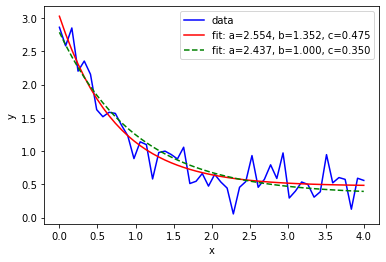

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c


xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata)
# popt
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))


popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
# popt

plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
DataFileLocation = "/home/fardousr/Desktop/Output/Collimator_Data/Neutron Study/"
DataFileList = [#'Coll_Energy_150MeV_Radius_0.5mm.root',
                'Coll_Energy_150MeV_Radius_1.0mm.root',
#                 'Coll_Energy_150MeV_Radius_1.5mm.root',
#                 'Coll_Energy_150MeV_Radius_2.0mm.root',
#                 'Coll_Energy_150MeV_Radius_2.5mm.root',
                'Coll_Energy_150MeV_Radius_3.0mm.root',
#                 'Coll_Energy_150MeV_Radius_3.5mm.root',
#                 'Coll_Energy_150MeV_Radius_4.0mm.root',
#                 'Coll_Energy_150MeV_Radius_4.5mm.root',
                'Coll_Energy_150MeV_Radius_5.0mm.root']

from scipy.optimize import curve_fit
plt.rcdefaults()
params = {'figure.figsize'   : (8, 5),
          'legend.fontsize'  : 11,
          'axes.labelsize'   : 14,
          'axes.titlesize'   : 14,
          'xtick.labelsize'  : 14,
          'ytick.labelsize'  : 14,
          'axes.facecolor'   : 'white'}
pylab.rcParams.update(params)

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.brg(np.linspace(0, 1, len(DataFileList)+2))))

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

lineLegend = ["1.0mm",   "3.0mm",  "5.0mm"] 
k = 2
for k in range(7): 
    file = DataFileLocation+"/"+DataFileList[k]
    DataFile = ROOT.TFile(file)

    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(k))
    Energy.SetDirectory(0)
    Energy_Z_projection = Energy.Project3D("z").Clone("Energy_Z_projection")
    Energy_Z_projection.SetDirectory(0)
    Max_Bin = Energy_Z_projection.GetMaximumBin()
    print(Max_Bin)



    NumProton = DataFile.Get('ParticelCounter').GetBinContent(1)
    Energy_RZ = DataFile.Get('ProtonRadialHisto').Clone("Energy_RZ")
    Energy_RZ.SetDirectory(0)
    Energy_RZ.Scale(1/NumProton)
    nBInsX = Energy_RZ.GetNbinsX()
    nBInsY = Energy_RZ.GetNbinsY()

    Dose_RZ = TH2D("Dose_RZ", "Dose_RZ", 800, 0, 200, 200, 0, 50)
    lenght = 0.25/1000       #m

    for i in range(1,nBInsX+1):
        for j in range(1,nBInsY+1):
            radius1       =     j*0.25
            radius2       = (j-1)*0.25
            bin_volume =(mt.pi*(radius1/1000)**2*lenght) - (mt.pi*(radius2/1000)**2*lenght)  
            mass = bin_volume*997
            Bin_number = Energy_RZ.GetBin(i,j);
            Bin_Energy = Energy_RZ.GetBinContent(Bin_number)
            Bin_Error  = Energy_RZ.GetBinError(Bin_number)
            Bin_Dose   = (Bin_Energy*1.60218*10**-19)/(mass)
            Dose_Error = (Bin_Error*1.60218*10**-19)/(mass)
            Energy_RZ.SetBinContent(Bin_number, Bin_Dose)
            Energy_RZ.SetBinError(i,j, Dose_Error)

    depth   = []
    pen80to20 = []
    # Energy_RZ.GetXaxis().SetRange(4*156, 4*156)
    for bin_pos in range(2, Max_Bin,8):
        Dose_R_projection = Energy_RZ.ProjectionY("Dose_projection", bin_pos, bin_pos, "d").Clone("Dose_R_projection")
        Dose_R_projection.SetDirectory(0)
        Max_Dose = Dose_R_projection.GetMaximum()
        p80 = Dose_R_projection.FindLastBinAbove(0.8*Max_Dose, 1, 1, 200)
        p20 = Dose_R_projection.FindLastBinAbove(0.2*Max_Dose, 1, 1, 200)
        pen80to20.append((p20-p80)/10)
        depth.append(bin_pos/4)


    plt.plot(depth, pen80to20, "o",  label = lineLegend[k], linewidth=0.2, markersize=1)
    plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=.5)
    plt.legend(loc='upper left', ncol=1)
    plt.xlabel("Radial Distance [mm]")
    plt.ylabel("Dose [Gy/Proton]")
    plt.xlim(0,180)


    x = depth
    y = pen80to20

    # calculate polynomial
    z = np.polyfit(x, y, 4)
    f = np.poly1d(z)

    # calculate new x's and y's
    x_new = np.linspace(x[0], x[-1], 50)
    y_new = f(x_new)

    plt.plot(x_new, y_new,"r-", linewidth=2)
plt.show()